# Part_II_slide_deck - [Fordgobike-trip]

## by Oluwadamilare Shiji

## Investigation Overview


> The investigation of this dataset was conducted using the Python libraries pandas, Matplotlib, seaborn, and numpy. This was conducted to look into biker characteristics that could be useful to predict trip duration. The main focus of this dataset the following variables which are `start_time`, `duration_sec`, `age`, `gender`, `user_type`.


## Dataset Overview

>A bike sharing program called GoBike was launched in the San Francisco Bay Area in 2017. The dataset was analysed and cleaned for the month of February 2019 and had 14 characteristics and 183,412 observations. The dataset can be found here. [GoBike](https://www.lyft.com/bikes/bay-wheels/system-data)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_bike_clean = pd.read_csv(r"C:\Users\MICHAEL\DA_Project\Module_3 Project\SUBMIT PROJECT\ford_bike_clean.csv")
ford_bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hour,start_month,start_hour,start_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,38,869.750000,14.495833,February,17,Thursday
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,50,1030.900000,17.181667,February,12,Thursday
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,33,608.166667,10.136111,February,17,Thursday
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,48,26.416667,0.440278,February,23,Thursday
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,63,29.883333,0.498056,February,23,Thursday


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike User Distribution

> From the total entry of 183,412 observations in  february 2019 data, it shows that more than four-fifths of bike users are Subscribers.     
>Customer :  16566     
>Subcriber : 158386     

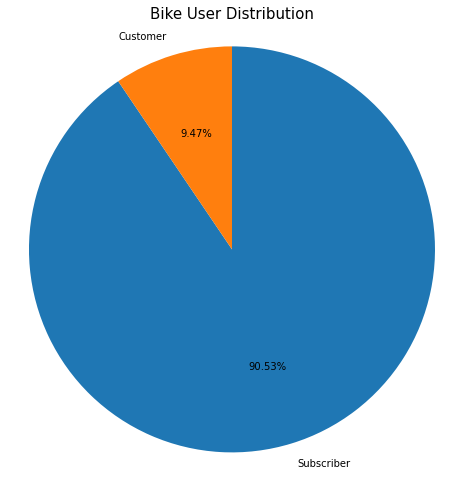

In [3]:
# Show user type by it's percentage
plt.figure(figsize=[14.70, 8.27])
sorted_counts = ford_bike_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Distribution', fontsize=15);

## Time Usage Analyses

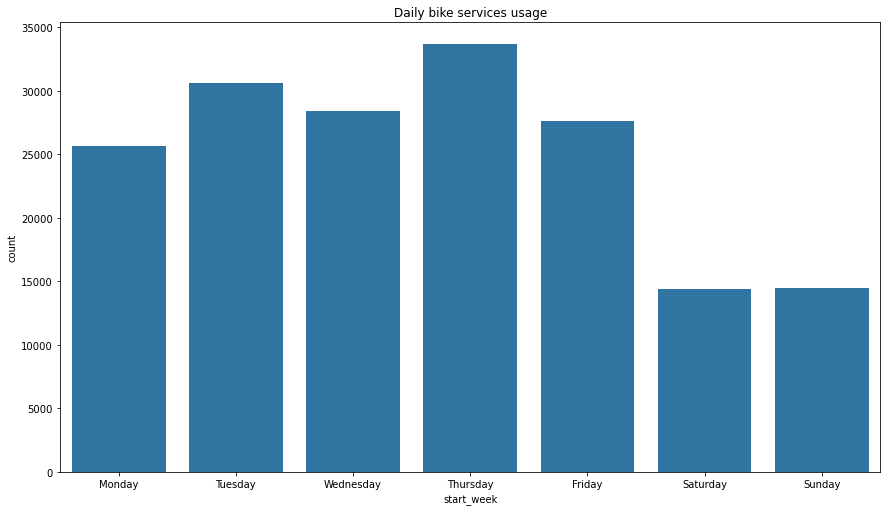

In [4]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[14.70, 8.27])
base_color = sns.color_palette()[0]
sns.countplot(data=ford_bike_clean, x='start_week', color=base_color, order=day_order);
plt.xlabel('start_week')
plt.title('Daily bike services usage');

> Most bike users make use of the bike services on Thursdays

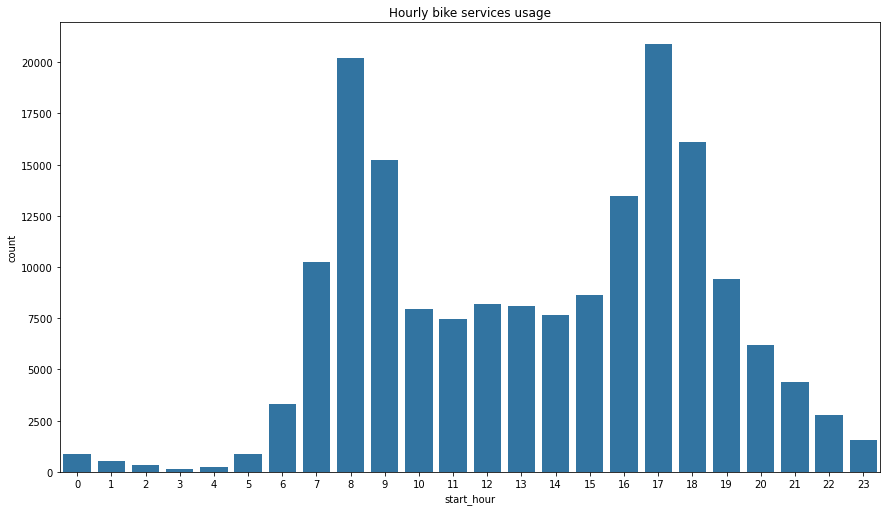

In [5]:
plt.figure(figsize=[14.70, 8.27])
base_color = sns.color_palette()[0]

sns.countplot(data=ford_bike_clean, x='start_hour', color= base_color);
plt.title('Hourly bike services usage');

> 8AM and 6AM are the most busy hours

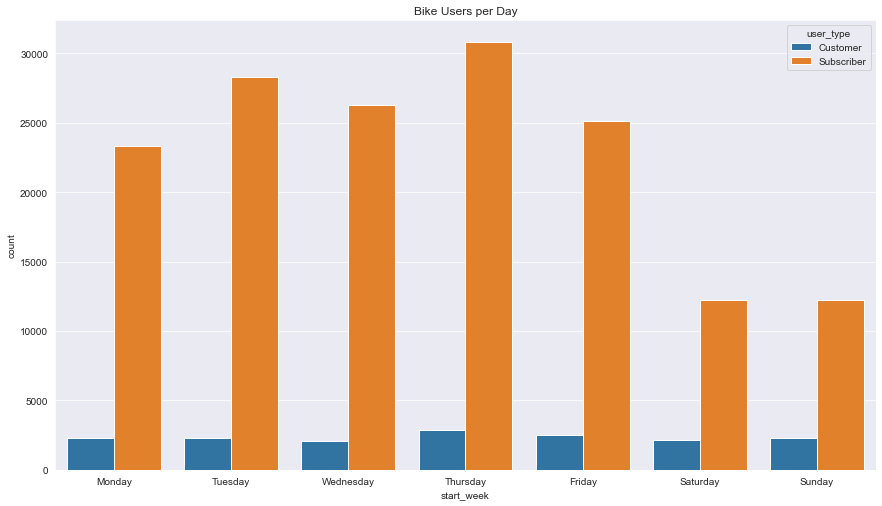

In [6]:
# plot the relationship between user_type and start_week

plt.figure(figsize = [14.70, 8.27])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


sns.set_style('darkgrid')

ax = sns.countplot(x ='start_week', hue = 'user_type', data = ford_bike_clean, order=day_order)
ax.set_title('Bike Users per Day');

> From the plot above, it is shown that both customers and subscribers uses the bike services during the weekdays especially on Thursdays than the weekends.

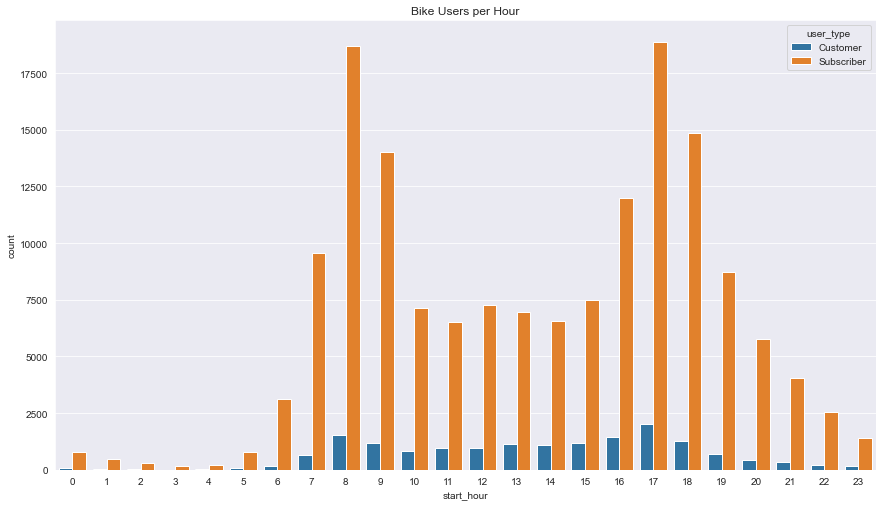

In [7]:
# plot the relationship between user_type and start_hour

plt.figure(figsize = [14.70, 8.27])

sns.set_style('darkgrid')

ax = sns.countplot(x ='start_hour', hue = 'user_type', data = ford_bike_clean)
ax.set_title('Bike Users per Hour');

>From the plot, it is shown that this is a bimodal plot. It also shows that there are 2 peak periods daily which are 8AM and 5PM. The reason for this is that by 8AM most customers and subscribers go to their various work places, schools, execrises and so on. Same as 5PM, most users are returning from schools, offices etc.

## Duration Trip Analyses

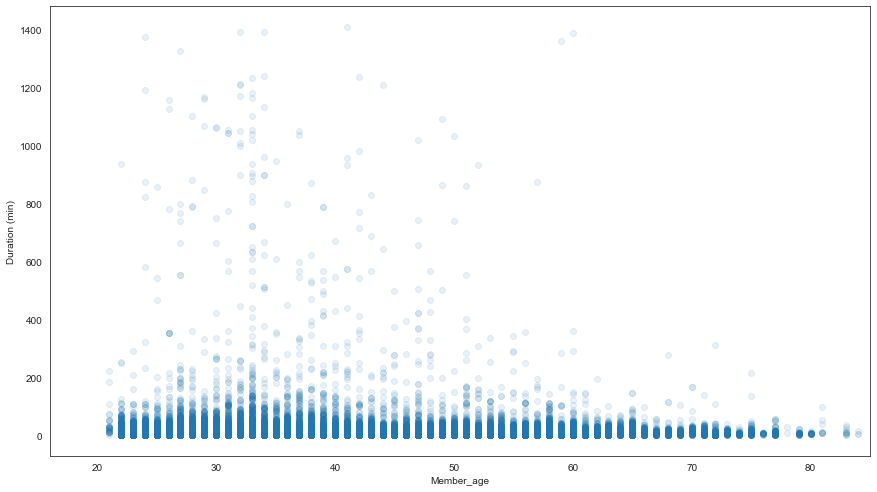

In [8]:
sns.set_style('white')

plt.figure(figsize = [14.70, 8.27])

plt.scatter(data = ford_bike_clean, x = 'member_age', y = 'duration_min', alpha=1/10)
plt.xlabel('Member_age')
plt.ylabel('Duration (min)')
plt.xlim(16,85);

>This shows that most users between ages 32 - 34 years ride the longest trips. While users above 70 years ride te shortest trips.

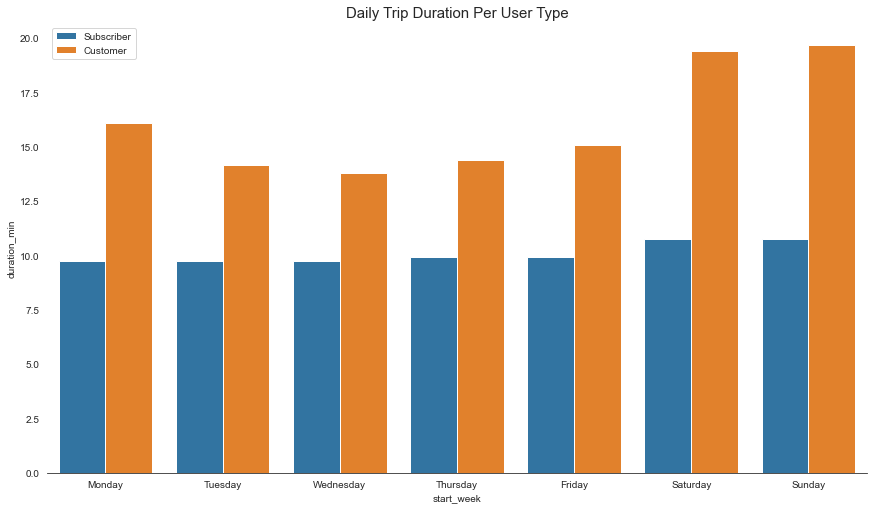

In [9]:
ride = ford_bike_clean.query('duration_min < 90')

plt.figure(figsize=[14.70, 8.27])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.title('Daily Trip Duration Per User Type', fontsize=15)
sns.barplot(data=ride, y='duration_min', x='start_week', ci=None, hue='user_type', order=day_order)


# Remove legend title
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

>From the plot above, it shows that both subscriber and customer user type spend more time on the trip duration during the weekends than the weekdays. This is because, most users do not go to their various offices and schools during the weekend. They tend to spend more time on running errands, exercises an so on.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [10]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Fordgobike-trip.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Fordgobike-trip.ipynb to slides
[NbConvertApp] Writing 777101 bytes to Part_II_slide_deck_Fordgobike-trip.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\MICHAEL\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\MICHAEL\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\MICHAEL\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\MICHAEL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\MICHAEL\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_s